In [62]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
city_df= pd.DataFrame(city_data)
ride_data=pd.read_csv(ride_data_to_load)
ride_df=pd.DataFrame(ride_data)

# Combine the data into a single dataset
combined_data= city_df.merge(ride_df, on=["city"])

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

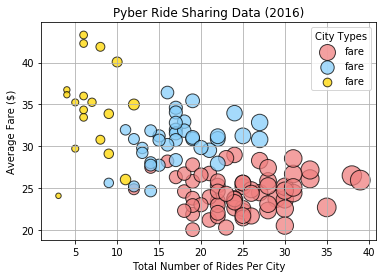

<Figure size 432x288 with 0 Axes>

In [63]:
# Obtain the x and y coordinates for each of the three city types
#URBAN
#x-values
urban_values=combined_data.loc[combined_data['type']=="Urban"]
city_groups_urban=urban_values.groupby(["city"]).count()
x_axis_urban=city_groups_urban["ride_id"]

#y-values
fare_groups_urban=urban_values.groupby(["city"])["fare"].mean()
y_axis_urban=fare_groups_urban

#size
urban_driver_count=city_groups_urban["driver_count"]

#SUBURBAN
#x-values
suburban_values=combined_data.loc[combined_data['type']=="Suburban"]
city_groups_suburban=suburban_values.groupby(["city"]).count()
x_axis_suburban=city_groups_suburban["ride_id"]

#y-values
fare_groups_suburban=suburban_values.groupby(["city"])["fare"].mean()
y_axis_suburban=fare_groups_suburban

#size
suburban_driver_count=city_groups_suburban["driver_count"]

#RURAL
#x-values
rural_values=combined_data.loc[combined_data['type']=="Rural"]
city_groups_rural=rural_values.groupby(["city"]).count()
x_axis_rural=city_groups_rural["ride_id"]

#y-values
fare_groups_rural=rural_values.groupby(["city"])["fare"].mean()
y_axis_rural=fare_groups_rural

#size
rural_driver_count=city_groups_rural["driver_count"]

# Build the scatter plots for each city types
urban=plt.scatter(x_axis_urban, y_axis_urban,s=urban_driver_count*10, marker="o", facecolors="lightcoral", edgecolors="black",alpha=0.75)
suburban=plt.scatter(x_axis_suburban, y_axis_suburban,s=suburban_driver_count*10, marker="o", facecolors="lightskyblue", edgecolors="black",alpha=0.75)
rural=plt.scatter(x_axis_rural, y_axis_rural, s=rural_driver_count*10, marker="o", facecolors="gold",edgecolors="black", alpha=0.75)

#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

#Grid
plt.grid()

# Create a legend

plt.legend(title="City Types",loc= "best")

plt.show()
# Incorporate a text label regarding circle size


# Save Figure
plt.savefig("Pyber_Bubble.png")


## Total Fares by City Type

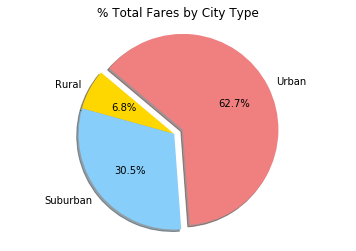

<Figure size 432x288 with 0 Axes>

In [74]:
#URBAN
urban_sums=urban_values["fare"].sum()

#SUBURBAN
suburban_sums=suburban_values["fare"].sum()

#RURAL
rural_sums=rural_values["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
sizes = [rural_sums,suburban_sums,urban_sums]
colors = ["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)

plt.title("% Total Fares by City Type")

#Plot Pie Chart
plt.pie(sizes,explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")

plt.show()

# Save Figure
plt.savefig("Total_Fare_Pie.png")


## Total Rides by City Type

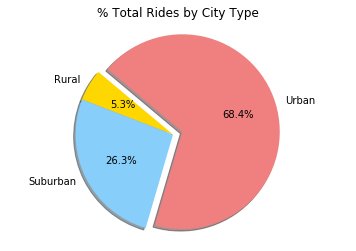

<Figure size 432x288 with 0 Axes>

In [80]:
#URBAN
urban_ride_count=urban_values["ride_id"].count()

#SUBURBAN
suburban_ride_count=suburban_values["ride_id"].count()

#RURAL
rural_ride_count=rural_values["ride_id"].count()

#Build Pie Chart
labels = ["Rural","Suburban","Urban"]
sizes = [rural_ride_count,suburban_ride_count,urban_ride_count]
colors = ["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)

plt.title("% Total Rides by City Type")

#Plot Pie Chart
plt.pie(sizes,explode= explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True,startangle=140)
plt.axis("equal")

plt.show()

# Save Figure
plt.savefig("Ride_By_Type.png")


## Total Drivers by City Type

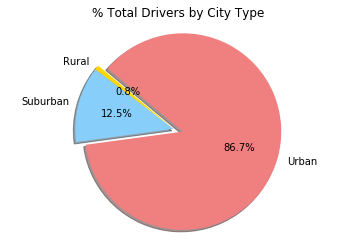

In [85]:
#URBAN
urban_driver=urban_values["driver_count"].sum()

#SUBURBAN
suburban_driver=suburban_values["driver_count"].sum()

#RURAL
rural_driver=rural_values["driver_count"].sum()


#Build Pie Chart
labels = ["Rural","Suburban","Urban"]
sizes = [rural_driver, suburban_driver, urban_driver]
colors = ["gold","lightskyblue","lightcoral"]
explode=(0,0,0.1)

plt.title("% Total Drivers by City Type")

#Plot Pie Chart
plt.pie(sizes,explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")

plt.show()

# # Save Figure
plt.savefig()

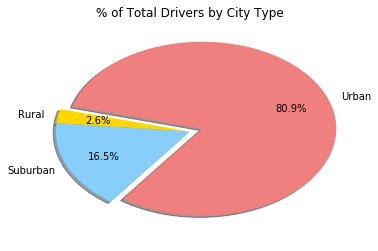

In [6]:
# Show Figure
plt.show()